### Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

### Plotting Helpers

In [2]:
FONT_SIZE = 13
def prettify_plot(ax):
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
    ax.legend(loc='best', prop={'size': FONT_SIZE})
    ax.grid(True)

def roc_prettify_plot(ax, set_title=True):
    prettify_plot(ax)
    ax.set_xlabel("False Positive Rate", fontsize=FONT_SIZE)
    ax.set_ylabel("True Positive Rate", fontsize=FONT_SIZE)
    if set_title:
        ax.set_title("Comparison Between Models: ROC-AUC", fontsize=15)

def prc_prettify_plot(ax, set_title=True):
    ax.set_ylim(-0.05, 1.05)
    prettify_plot(ax)
    ax.set_xlabel("Recall", fontsize=FONT_SIZE)
    ax.set_ylabel("Precision", fontsize=FONT_SIZE)
    if set_title:
        ax.set_title("Comparison Between Models: AUPRC", fontsize=15)

## Generate Labels and Models

In [3]:
def _create_labels(n, n_pos, random_state=None):
    if n is None or n_pos is None:
        return np.array([], dtype=int)
    pos_idxs = np.random.default_rng(random_state).choice(
        np.arange(n), size=n_pos, replace=False)
    labels = np.zeros(n)
    labels[pos_idxs] = 1
    return labels.astype(int)

def create_labels(n: int, n_pos: int, k: int = None, k_pos: int = None,
                  random_state: int = None) -> np.ndarray:
    """Create random labels.
    
    This can be used to simulate ordered model predictions.
    
    Args:
        n: Total number of labels.
        n_pos: Total number of positives to randomly place among the labels.
        k: Used for `k_pos`.
        k_pos: Place `k_pos` positives in the top `k` labels.
        random_state: Set seed for reproducibility.
    """
    labels_top = _create_labels(k, k_pos, random_state=random_state)
    
    tail = n if k is None else n - k
    tail_pos = n_pos if k is None else n_pos - k_pos
    labels_tail = _create_labels(tail, tail_pos, random_state=random_state)
    
    return np.concatenate((labels_top, labels_tail))

In [4]:
n_pos = 20
n_neg = 2000

RANDOM_STATE = 1
# These variables represent the predictions of our models
y_true1 = create_labels(n_pos + n_neg, n_pos, n_pos, int(n_pos * 0.8), random_state=RANDOM_STATE)
y_true2 = create_labels(n_pos + n_neg, n_pos, n_pos * 3, int(n_pos * 0.8), random_state=RANDOM_STATE*2)

# That's a monotonically decreasing ordering since the
# `y_true` variables are already ordered
y_pred = np.linspace(start=1, stop=0, num=n_pos + n_neg)

## Plot the Results

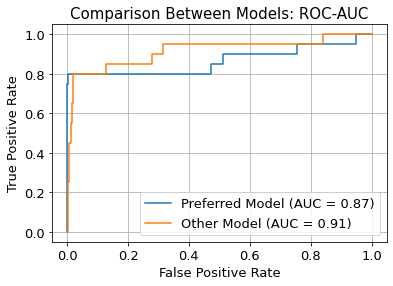

In [5]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_true1, y_pred, name="Preferred Model", ax=ax)
RocCurveDisplay.from_predictions(y_true2, y_pred, name="Other Model", ax=ax)
roc_prettify_plot(ax)

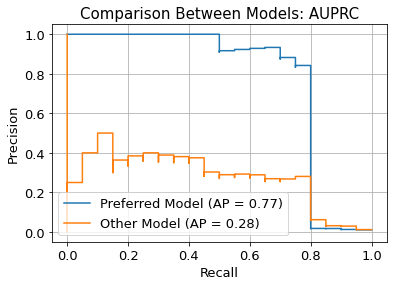

In [6]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_true1, y_pred, name="Preferred Model", ax=ax)
PrecisionRecallDisplay.from_predictions(y_true2, y_pred, name="Other Model", ax=ax)
prc_prettify_plot(ax)

### Toy experiments

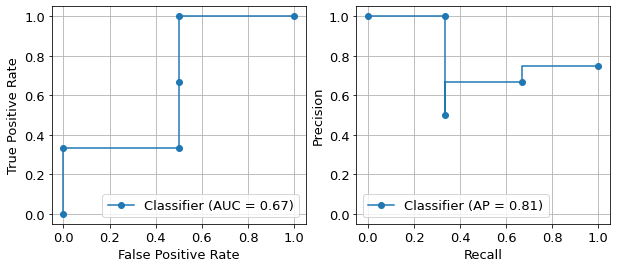

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax = axes[0]
ax.scatter([0.5], [2/3], marker='o')
RocCurveDisplay.from_predictions([1, 0, 1, 1, 0], [0.9, 0.7, 0.6, 0.5, 0.1], ax=ax, marker='o')
roc_prettify_plot(ax, set_title=False)

ax = axes[1]
PrecisionRecallDisplay.from_predictions([1, 0, 1, 1, 0], [0.9, 0.7, 0.6, 0.5, 0.1], ax=ax, marker='o')
prc_prettify_plot(ax, set_title=False)